**Подключаем библиотеки**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
import catboost
from catboost import *
from catboost import datasets
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import optuna
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

**Importing data**

In [41]:
train = pd.read_csv(r'C:\Users\Shant\OneDrive\Рабочий стол/train (4).csv')
train

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,target
0,-6.130724,7.429628,3.651437,-1.950971,-3.384415,1.095934,-3.077774,-2.619091,5.128201,1.228476,...,0.392978,4.920467,16.610460,-2.430804,-1.405573,18.610209,-4.140715,6.027816,-20.288145,0
1,5.161836,-6.514011,-7.474612,-4.544336,-13.081404,1.637562,-1.094672,-1.253545,-2.955342,-10.958200,...,-4.840233,-0.514308,4.613289,2.391302,-4.795664,4.208278,-2.017168,-8.510424,10.806639,0
2,-2.971550,-21.508184,-1.125457,1.524129,3.027444,1.045879,1.551050,1.512075,-1.955564,3.683893,...,-0.385303,2.647917,-2.200556,1.058671,1.076312,-7.802389,-7.553953,0.636639,14.274950,0
3,6.724419,0.566489,0.509764,-4.524162,10.367236,2.083270,0.741790,-2.077787,-2.912744,-4.040637,...,4.731346,15.378418,-14.031666,2.659410,5.123620,-8.500321,3.417960,-14.798490,-6.132800,1
4,-2.213659,-4.678213,-0.135845,2.375933,0.916649,1.027195,-0.353265,-0.220609,-3.416823,-5.964181,...,1.598330,-4.996614,4.504269,1.918961,-2.076223,0.154039,-2.016779,10.803205,5.942927,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6958,1.554111,2.018845,-2.550991,-2.049014,0.931923,1.329123,2.260598,0.907393,0.559868,-0.366525,...,-2.078071,2.774934,-5.819371,-1.397282,0.629832,-1.098601,-7.498520,-7.752161,12.691050,0
6959,5.341612,-4.057497,0.712336,-0.529023,2.389152,1.048196,-4.248458,-2.516312,1.612912,0.088317,...,-0.120301,-3.247273,-3.348203,2.651849,1.059434,-2.842064,-1.960203,-5.095832,-0.174943,0
6960,-2.348591,-8.263995,-0.318484,1.851011,-4.880470,1.392923,-4.348202,2.937274,-3.067852,-0.173702,...,0.819033,0.794195,9.353774,-1.841798,-1.116251,6.708149,-1.841971,5.747190,-7.608288,0
6961,5.481595,4.899412,-0.421851,4.639328,-20.671090,1.088426,-3.838050,0.622003,1.548813,-8.847505,...,1.697137,-8.315975,6.149865,1.437154,-7.284716,4.566744,-0.908937,11.555781,2.889093,0


**Checking for outliners**

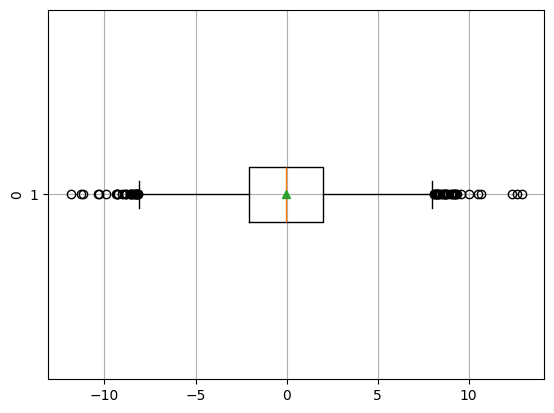

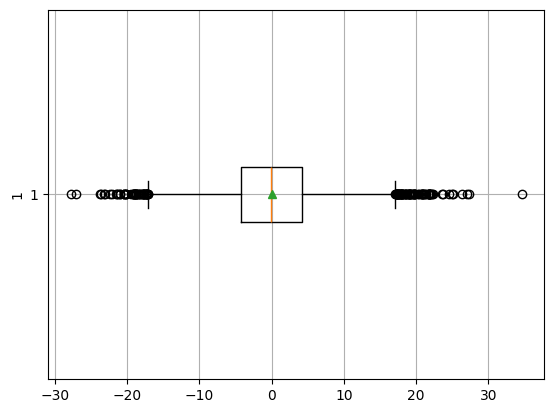

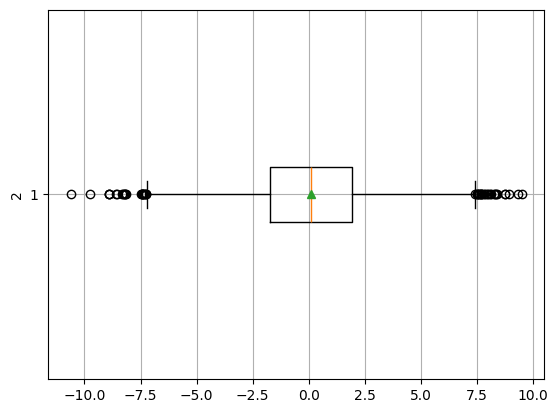

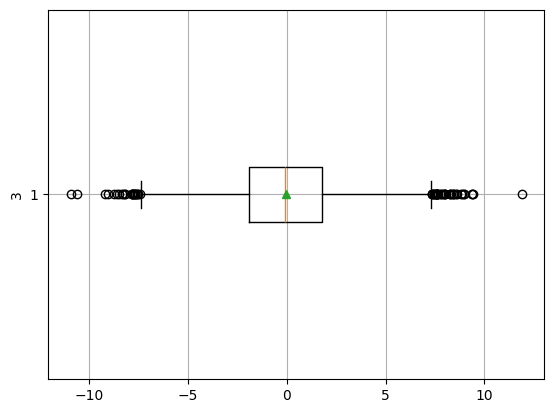

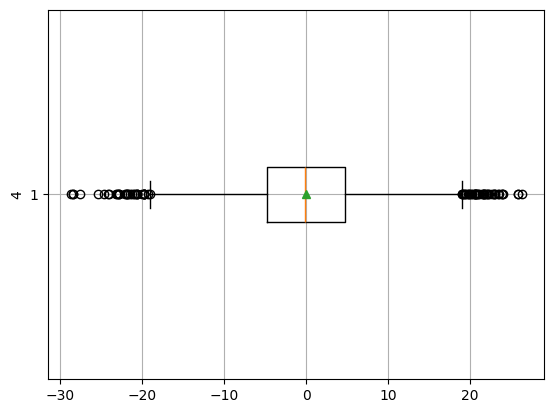

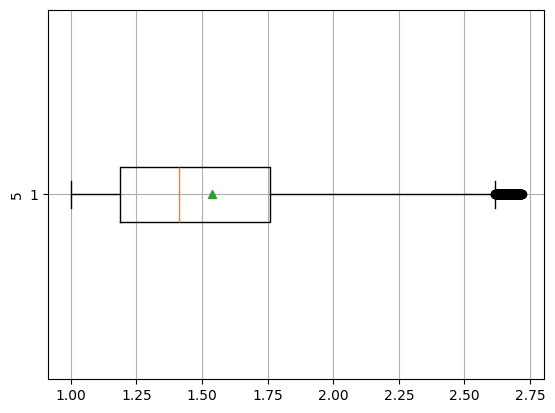

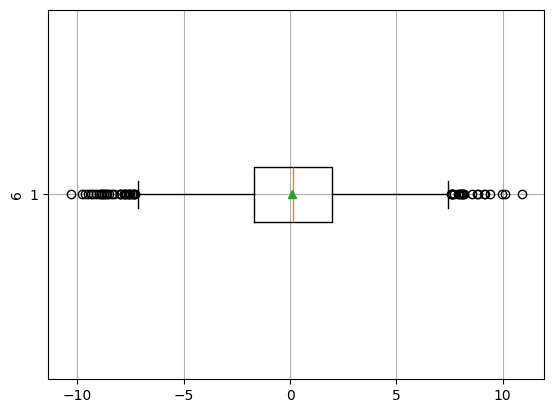

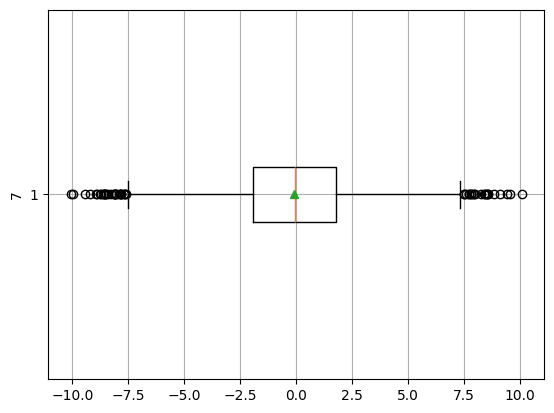

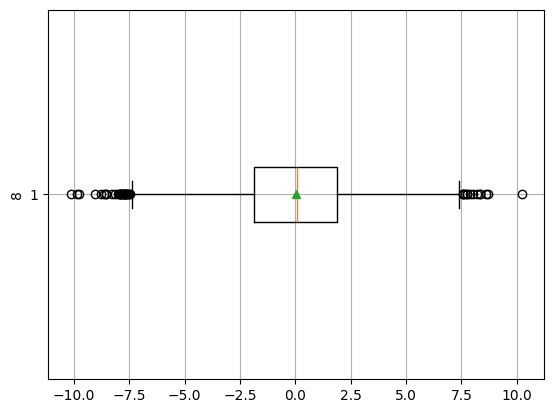

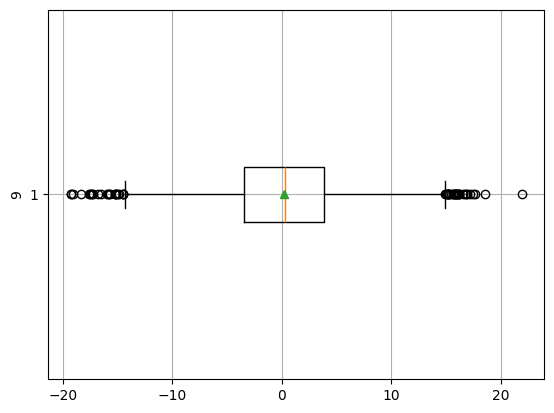

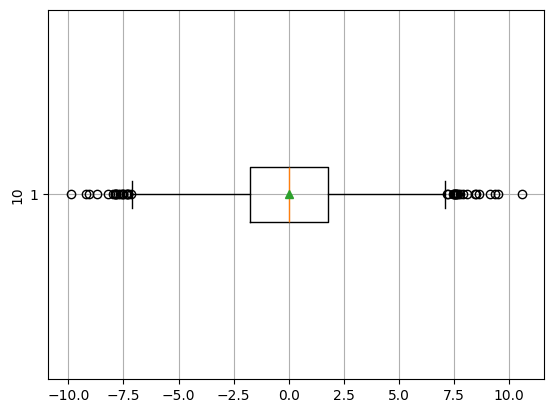

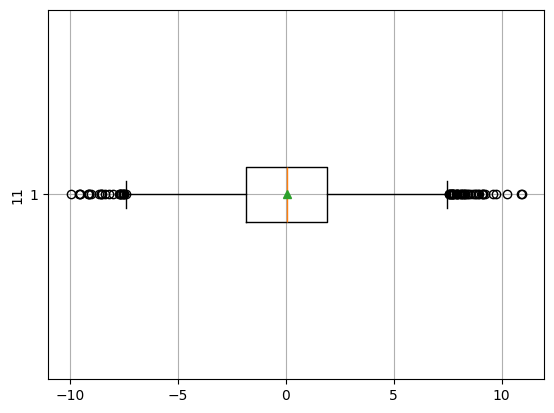

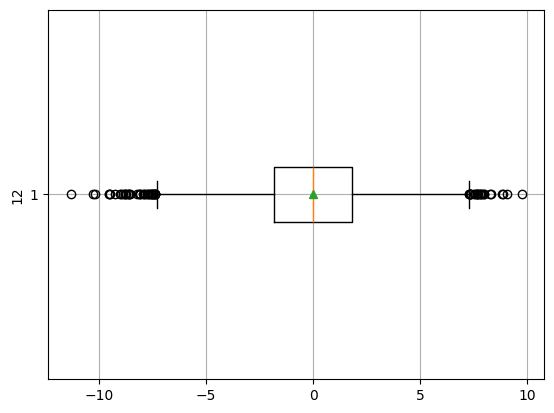

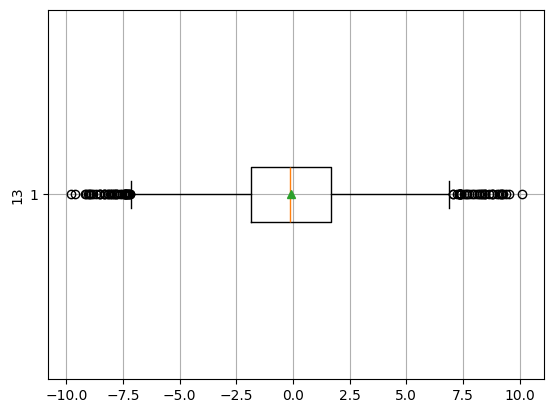

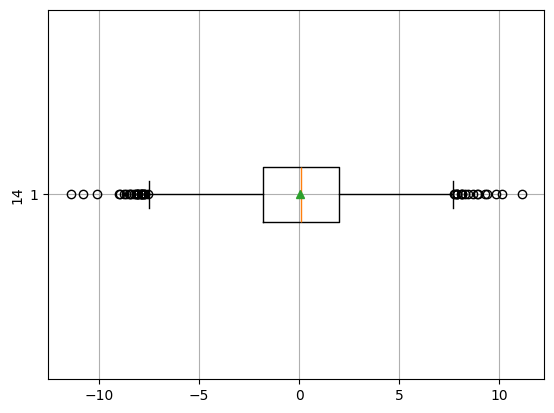

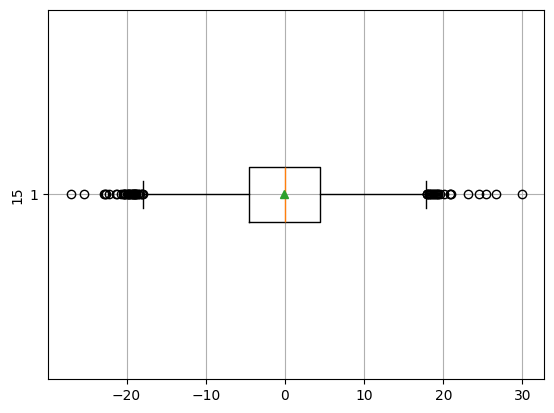

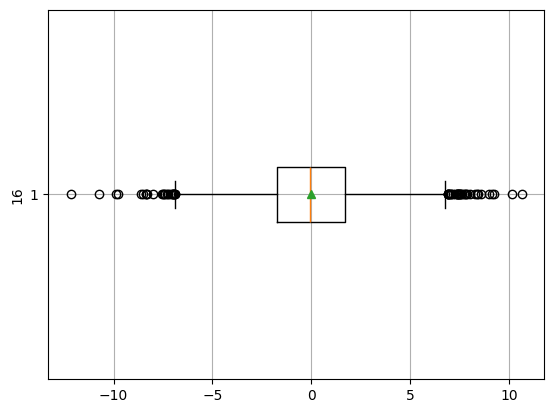

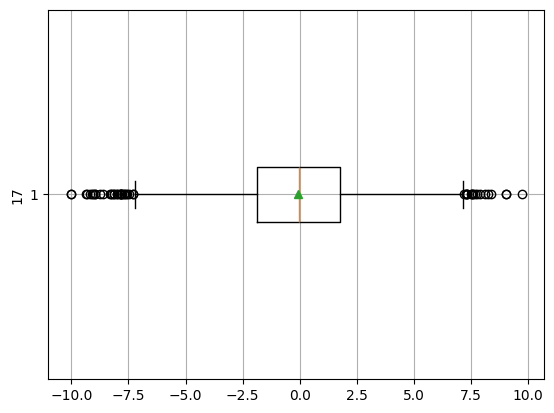

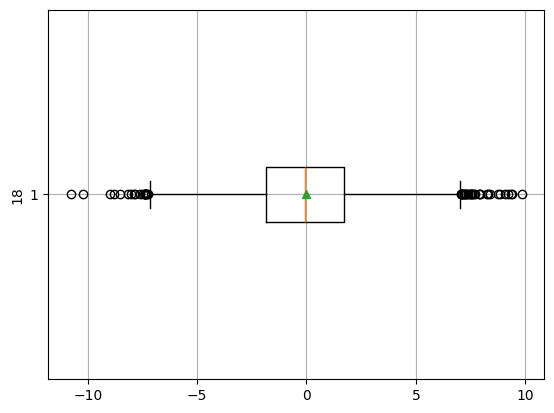

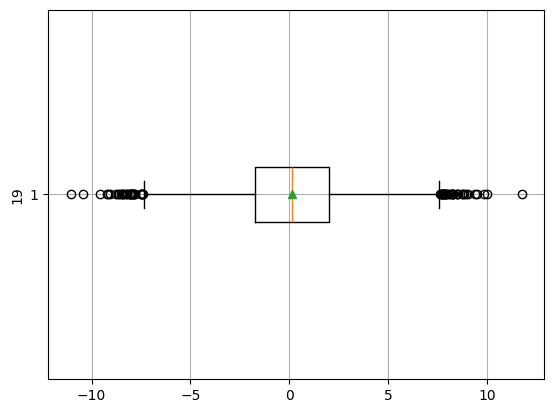

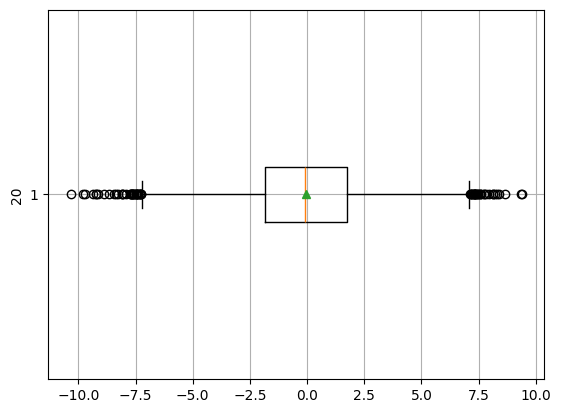

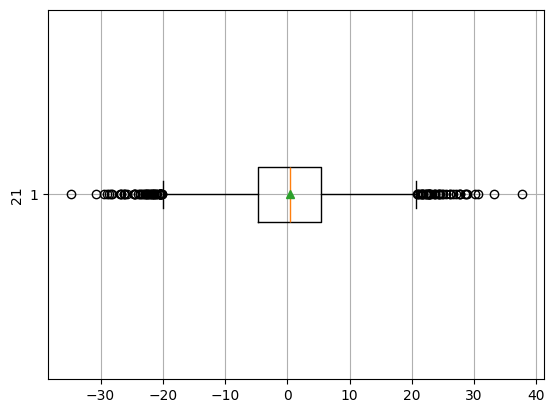

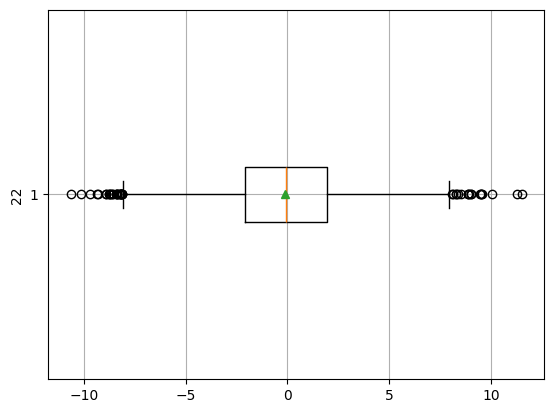

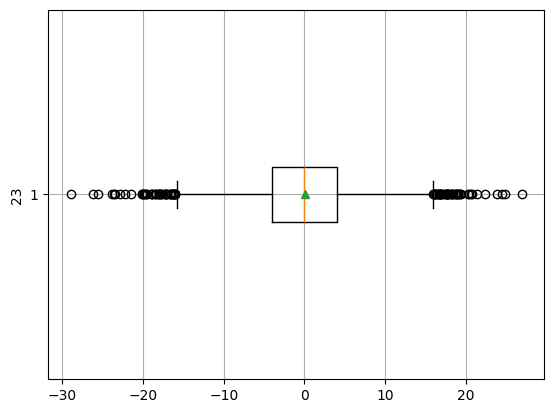

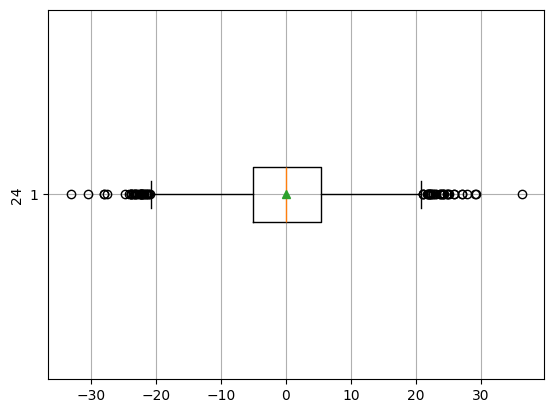

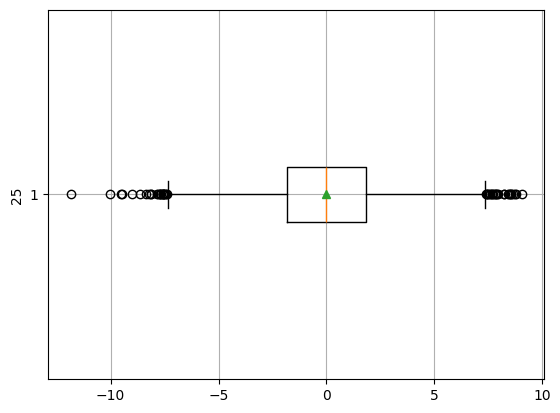

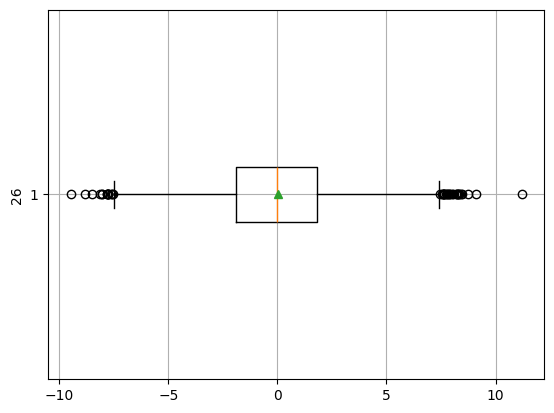

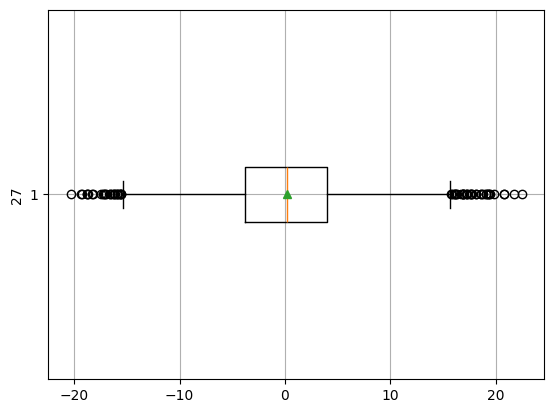

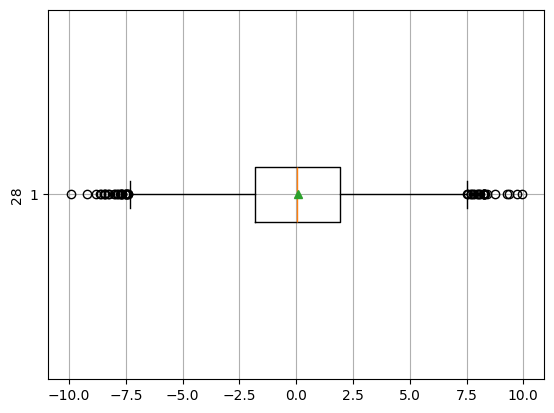

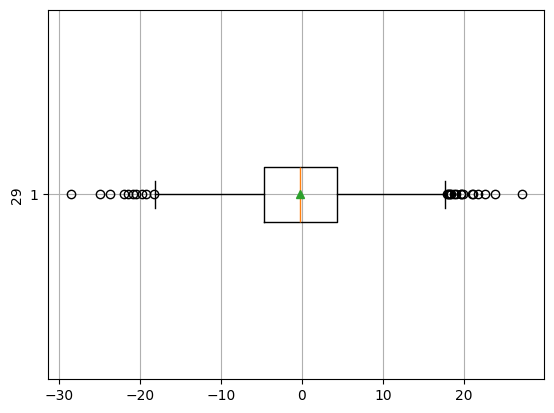

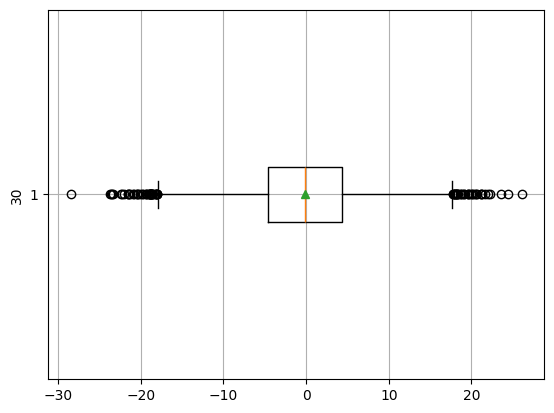

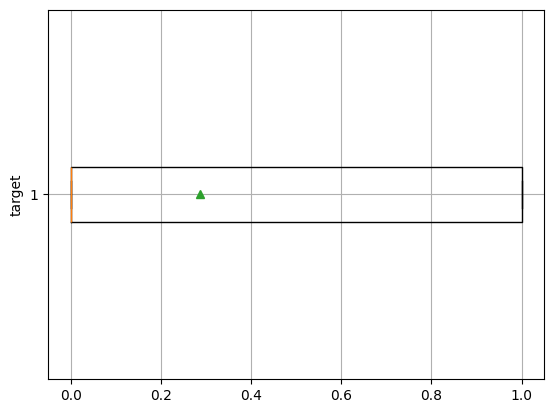

In [42]:
features = train.columns

data_col = list(train.columns)

for i in range(len(data_col)):
    plt.boxplot(train[data_col[i]], showmeans=True, vert=False)
    plt.ylabel(data_col[i])
    plt.grid()
    plt.show()

**Let's look at the distribution by target on the chart**

C:\Users\Shant\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


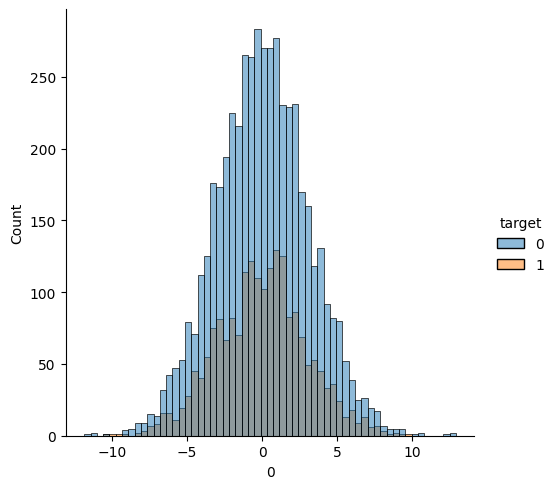

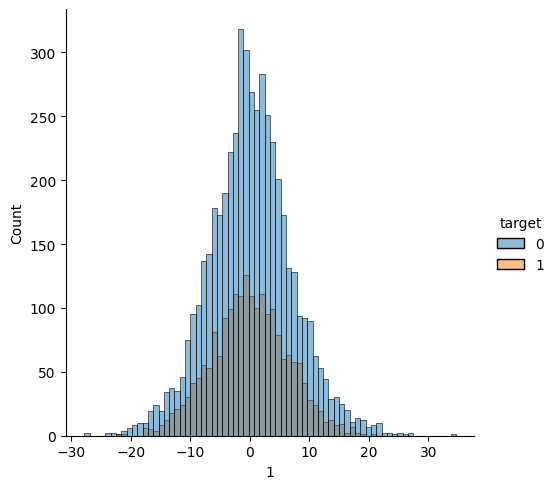

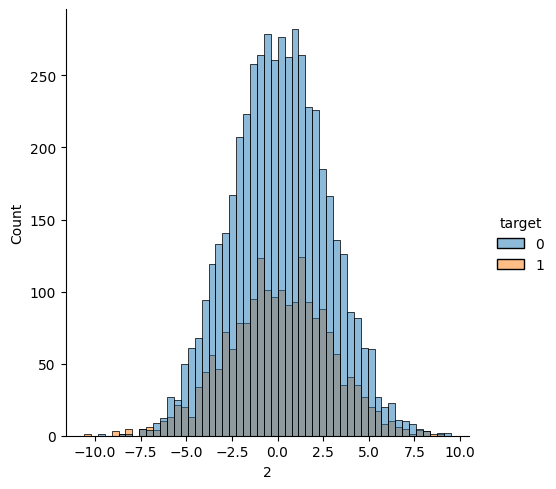

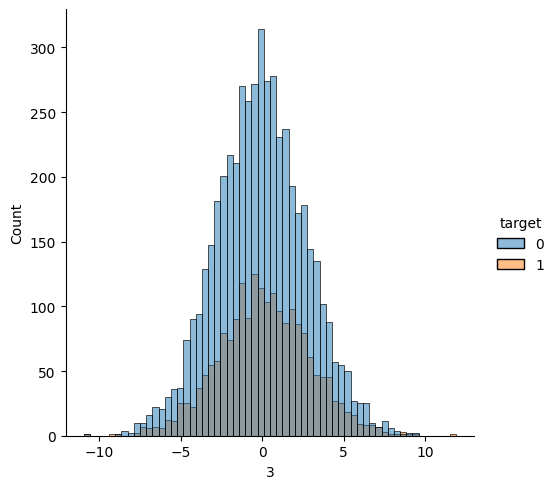

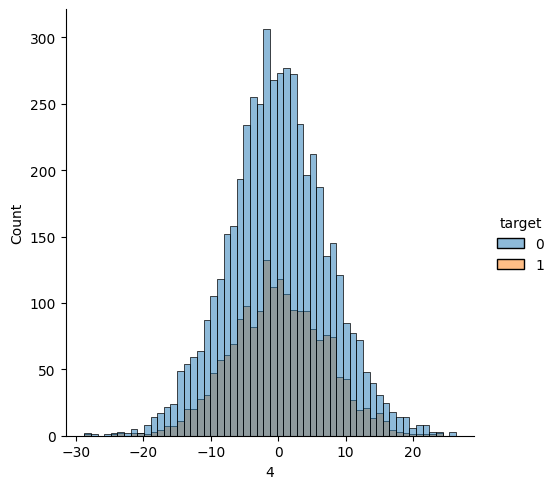

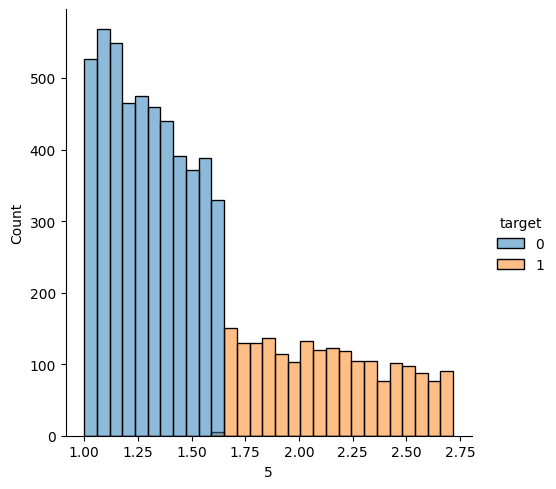

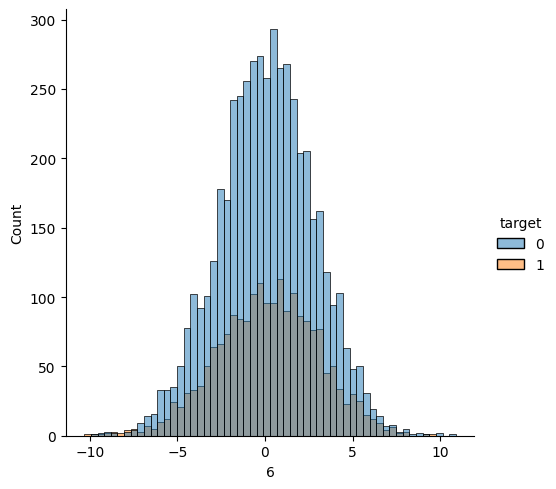

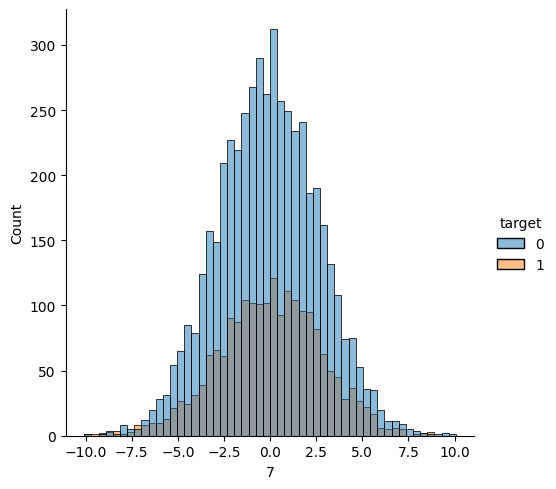

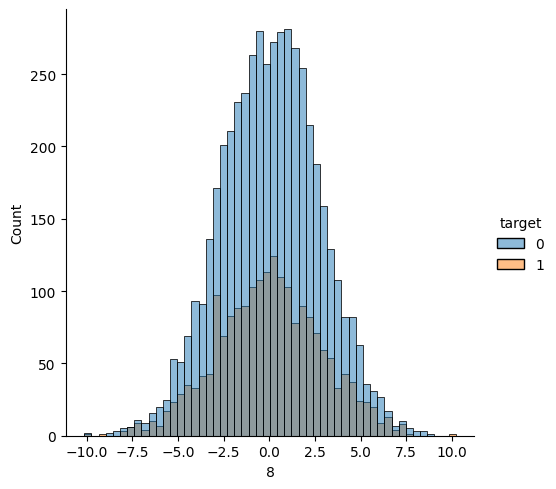

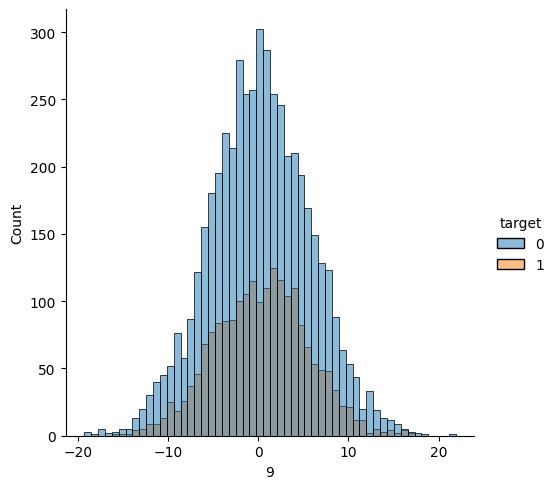

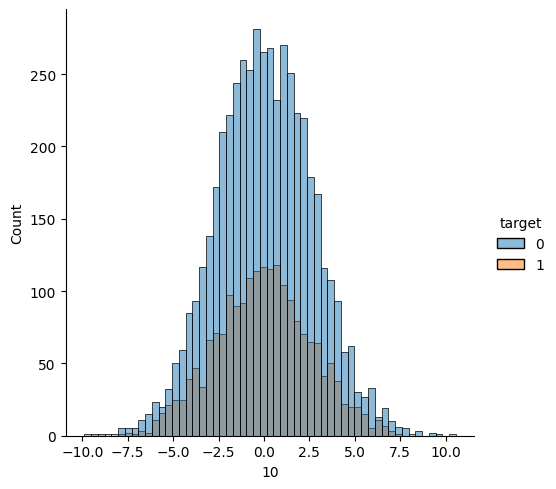

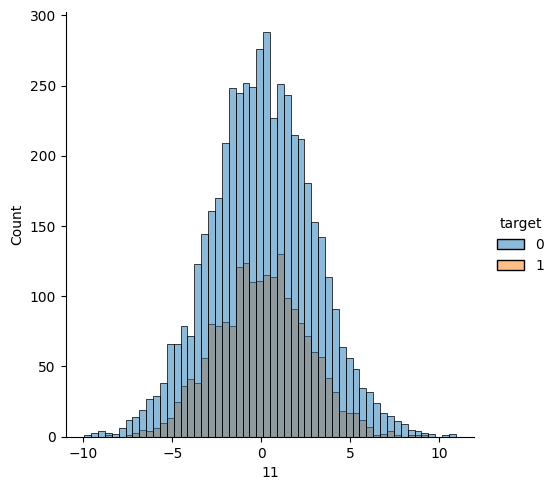

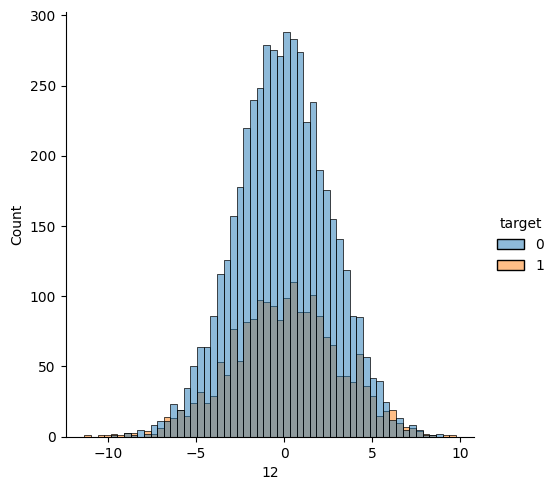

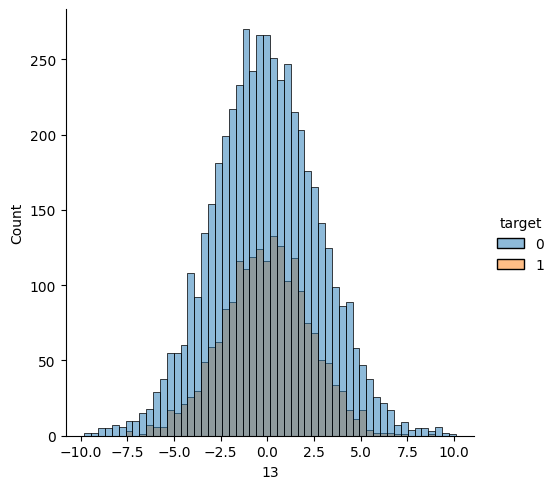

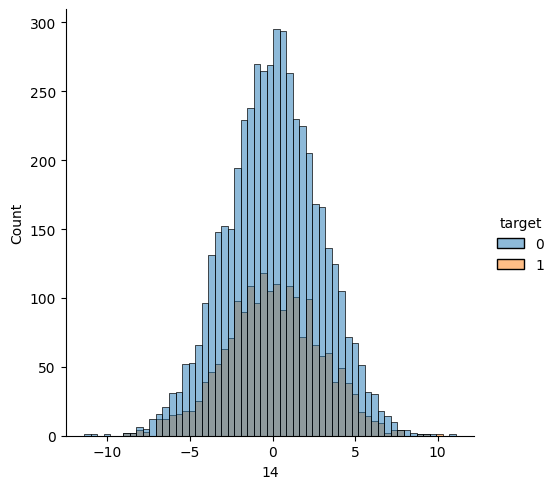

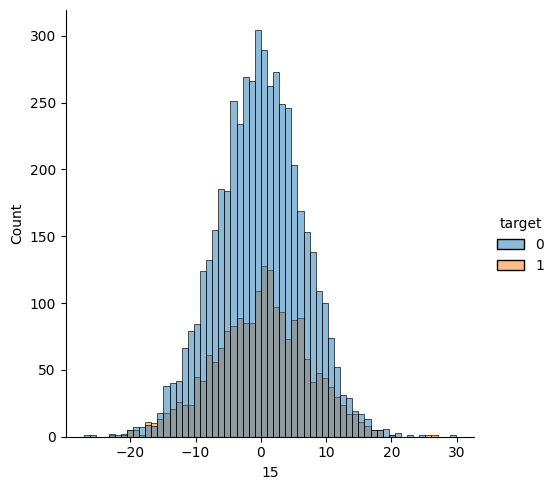

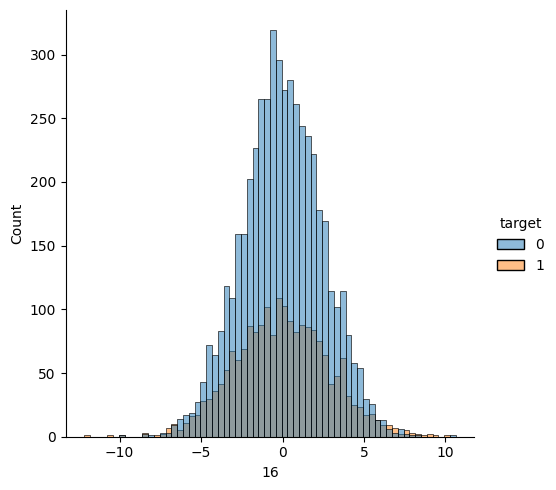

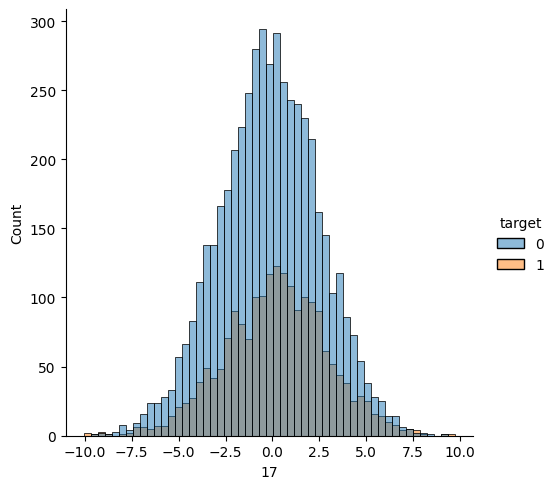

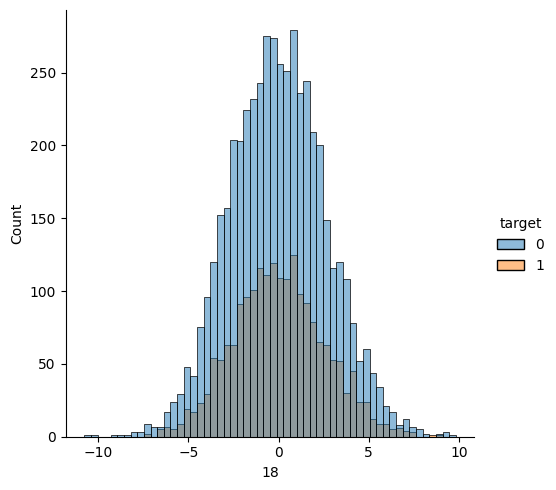

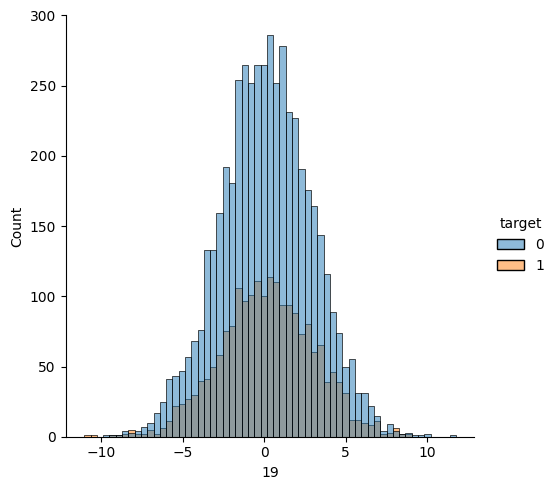

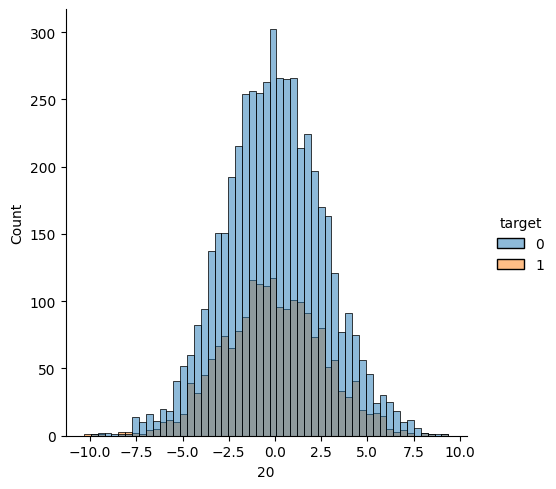

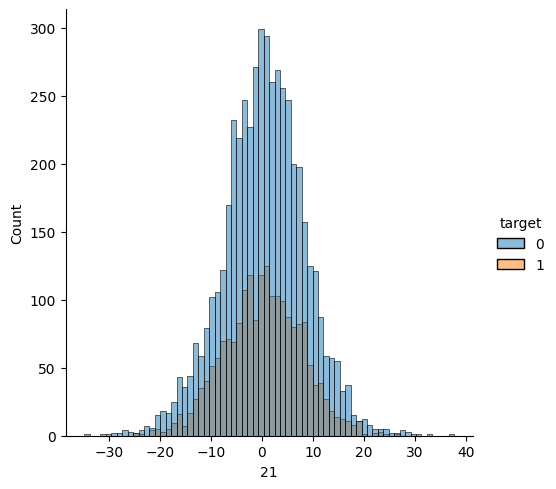

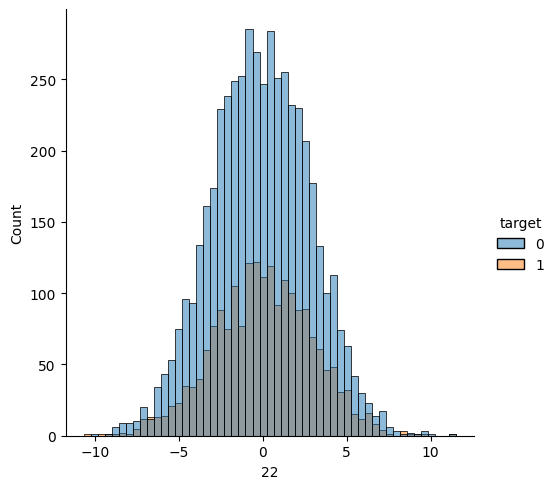

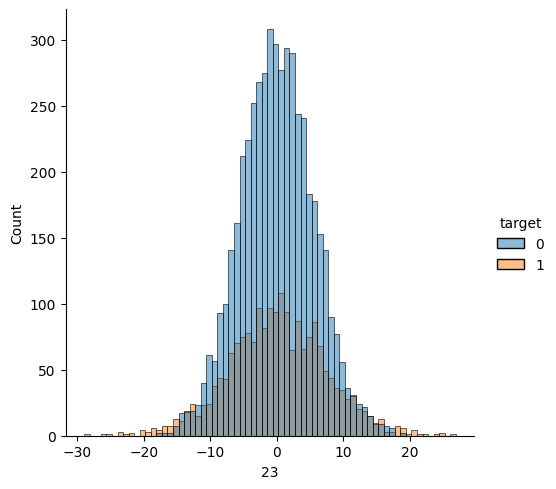

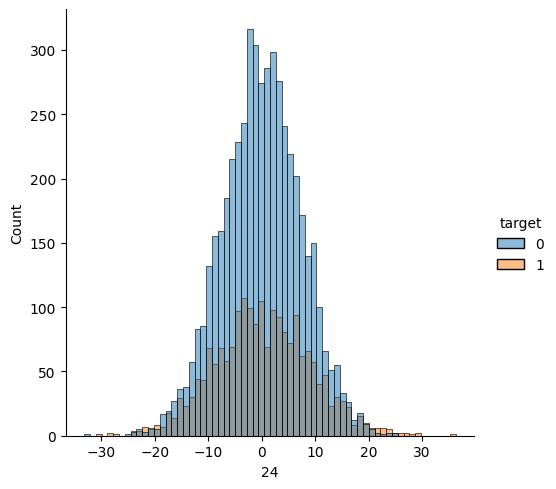

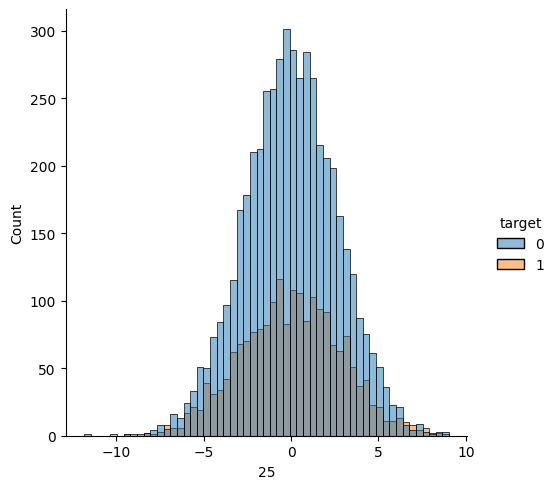

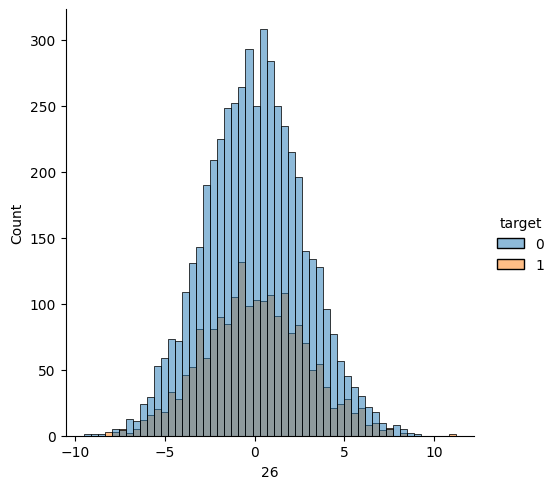

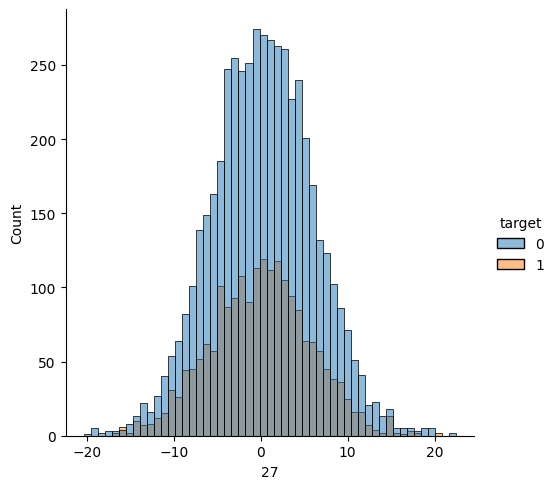

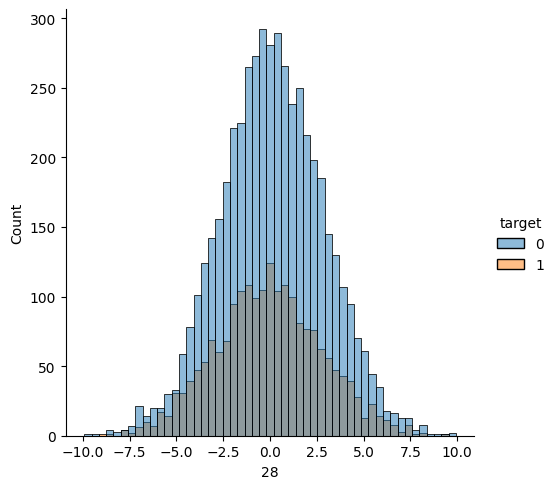

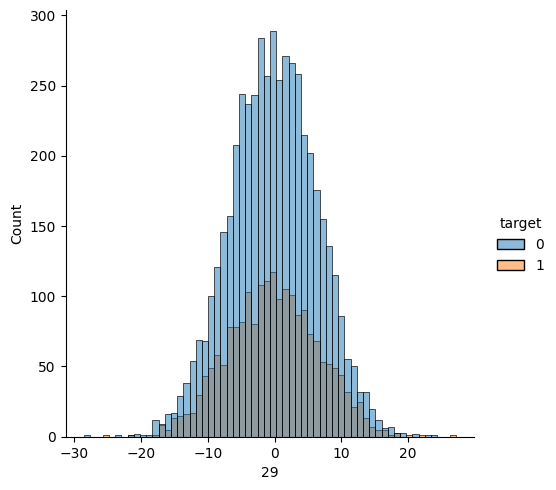

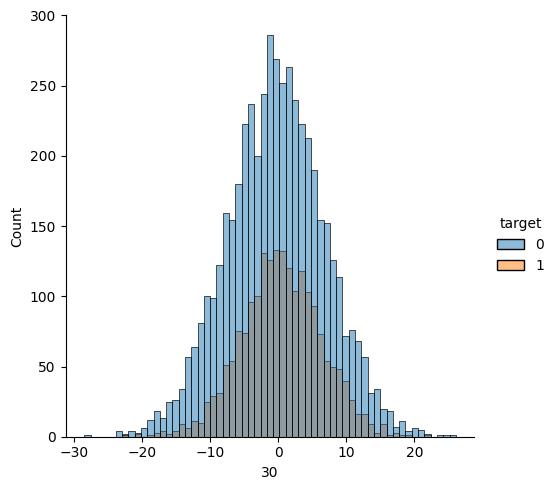

In [43]:
for i in range(len(features) - 1):
    sns.displot(train, x=features[i], hue='target')

**Removing 5th sign**

In [44]:
train = train.drop('5', axis=1)

**Divide into train and test**

In [45]:
y_train = train['target']
train = train.drop('target', axis=1)

**Let's look at the distribution by target**

In [46]:
y_train.value_counts()

target
0    4963
1    2000
Name: count, dtype: int64

**Using the Oversampling Method to Eliminate Class Imbalance**

In [47]:
smt = SMOTE(random_state=42)

train, y_train = smt.fit_resample(train, y_train)

**Using MinMaxScaler to prepare data**

In [48]:
ss = MinMaxScaler()
data = ss.fit_transform(train) 
data = pd.DataFrame(train)

**Using polynomial features**

In [49]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
train = poly_features.fit_transform(train)
train = pd.DataFrame(train)

In [50]:
train.shape

(9926, 495)

**Selecting the best features**

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 [Text(-100.0, 0, '−100'),
  Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600')])

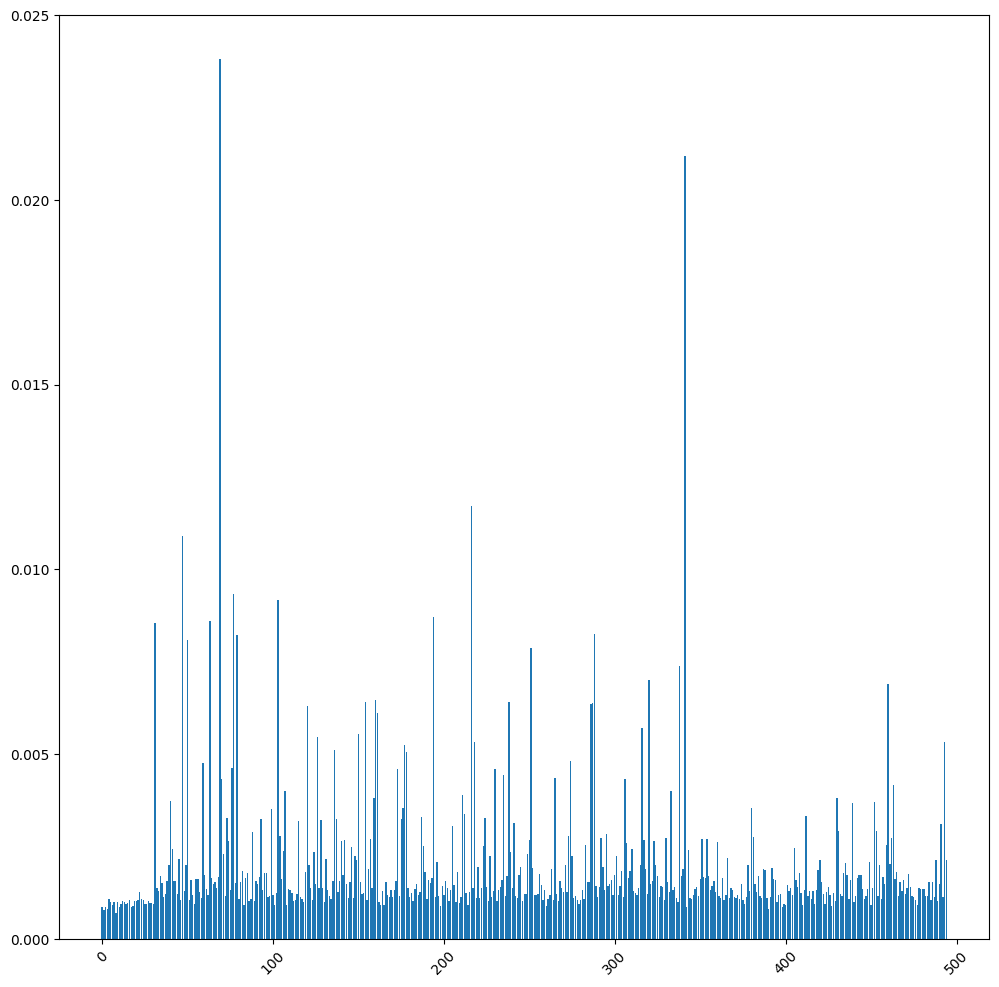

In [51]:
clf = RandomForestClassifier()
clf.fit(train, y_train)

plt.figure(figsize=(12,12))
plt.bar(train.columns, clf.feature_importances_)
plt.xticks(rotation=45)

In [52]:
importances = pd.DataFrame(clf.feature_importances_, index=train.columns)
final_coefs = importances[importances[0] > 0.0035]
c = list(final_coefs.index)

In [53]:
train = train[c]

In [54]:
train.shape

(9926, 52)

In [55]:
X_train, X_val, y_train, y_val = train_test_split(train, y_train, test_size=0.2)

**Training the model with Logistic Regression with hyperparameter selection using GridSearchCV**

In [56]:
logistic_regression = LogisticRegression()


param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-3, 3, 7),
    'solver': ['liblinear']
}


grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)


print("Лучшие параметры:", grid_search.best_params_)


y_val_pred = grid_search.predict(X_val)

Лучшие параметры: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}


In [57]:
print(roc_auc_score(y_val, y_val_pred))

0.8873219724283554


**Train the model using CatBoost gradient boosting. To select hyperparameters using Optuna.**

In [58]:
def objective(trial):
    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
        "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "used_ram_limit": "3gb",
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    cat_cls = CatBoostClassifier(**param)

    cat_cls.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=0, early_stopping_rounds=100)

    preds = cat_cls.predict(X_val)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(y_val, pred_labels)
    return accuracy




if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=50, timeout=600)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2024-01-28 04:07:08,718] A new study created in memory with name: no-name-2e621979-0e0e-47fe-815c-99607366cd67
[I 2024-01-28 04:08:04,618] Trial 0 finished with value: 0.9204431017119838 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.08976422755177173, 'depth': 8, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 0 with value: 0.9204431017119838.
[I 2024-01-28 04:08:16,568] Trial 1 finished with value: 0.8610271903323263 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.021002299536477257, 'depth': 1, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.959179639904458}. Best is trial 0 with value: 0.9204431017119838.
[I 2024-01-28 04:15:06,287] Trial 2 finished with value: 0.9249748237663645 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.06305184348337052, 'depth': 12, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.8031515548549271}. Best is trial 2 with value: 0.924974

Number of finished trials: 7
Best trial:
  Value: 0.9254783484390735
  Params: 
    objective: CrossEntropy
    colsample_bylevel: 0.05205638719089451
    depth: 11
    boosting_type: Plain
    bootstrap_type: MVS


**Training the model with selected hyperparameters, checking the quality and displaying the error matrix**

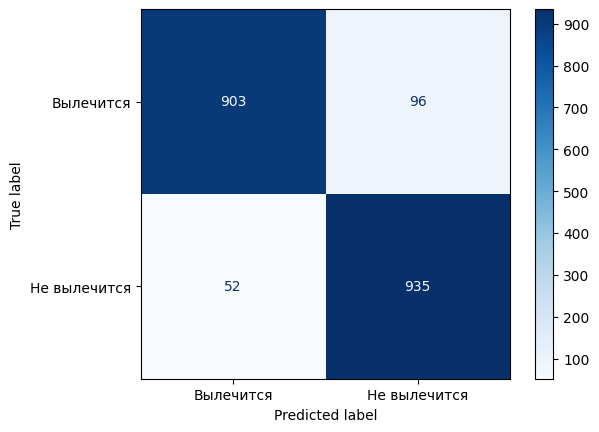

In [62]:
model = CatBoostClassifier(verbose=False,random_state=0,
                          objective = 'CrossEntropy',
    colsample_bylevel = 0.05205638719089451,
    depth = 11,
    boosting_type = 'Plain',
    bootstrap_type = 'MVS') 

model.fit(X_train, y_train,eval_set=(X_val, y_val))
y_pred_val = model.predict(X_val)




cm = confusion_matrix(y_val,y_pred_val)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Вылечится', 'Не вылечится'])
disp.plot(cmap='Blues', values_format='d')

plt.show()

In [63]:
print(roc_auc_score(y_val, y_pred_val))

0.9256095000775851


**Now using Tensorflow for training**

In [64]:
model1 = Sequential()

model1.add(Dense(11, input_dim=52, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.AUC(name='roc_auc')])

model1.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
794/794 [==============================] - 3s 2ms/step - loss: 1.9300 - roc_auc: 0.8067
Epoch 2/150
794/794 [==============================] - 2s 3ms/step - loss: 0.5884 - roc_auc: 0.9103
Epoch 3/150
794/794 [==============================] - 2s 2ms/step - loss: 0.4180 - roc_auc: 0.9340
Epoch 4/150
794/794 [==============================] - 2s 3ms/step - loss: 0.3392 - roc_auc: 0.9455
Epoch 5/150
794/794 [==============================] - 2s 3ms/step - loss: 0.2973 - roc_auc: 0.9530
Epoch 6/150
794/794 [==============================] - 2s 3ms/step - loss: 0.2696 - roc_auc: 0.9593
Epoch 7/150
794/794 [==============================] - 2s 2ms/step - loss: 0.2480 - roc_auc: 0.9639
Epoch 8/150
794/794 [==============================] - 2s 2ms/step - loss: 0.2335 - roc_auc: 0.9673
Epoch 9/150
794/794 [==============================] - 2s 3ms/step - loss: 0.2226 - roc_auc: 0.9700
Epoch 10/150
794/794 [==============================] - 2s 3ms/step - loss: 0.2180 - roc_auc: 0.9710

In [65]:
y_pred_tenser = model1.predict(X_val)

63/63 [==============================] - 0s 2ms/step


In [66]:
print(roc_auc_score(y_val, y_pred_tenser))

0.9715120388879254


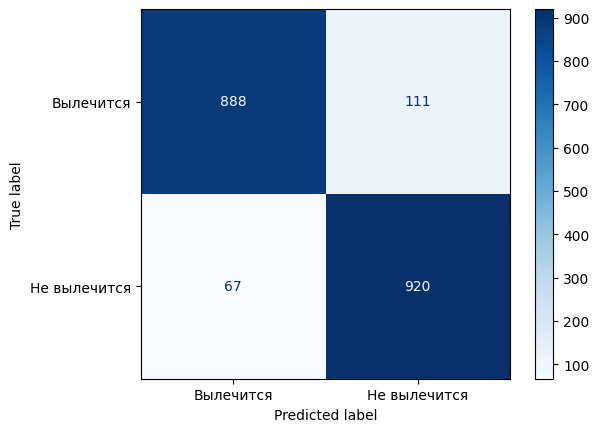

In [67]:
y_pred_binary = (y_pred_tenser > 0.5).astype(int)


cm = confusion_matrix(y_val, y_pred_binary)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Вылечится', 'Не вылечится'])
disp.plot(cmap='Blues', values_format='d')

plt.show()

In [82]:
from sklearn.metrics import roc_curve

def draw_for_tensor(model):
    y_train_predicted = model.predict(X_train)
    y_valid_predicted = model.predict(X_val)
    
    train_auc = roc_auc_score(y_train, y_train_predicted)
    valid_auc = roc_auc_score(y_val, y_valid_predicted)

    plt.figure(figsize=(20,10))
    plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
    plt.plot(*roc_curve(y_val, y_valid_predicted)[:2], label='valid AUC={:.4f}'.format(valid_auc))
    legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")
    plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
    plt.show()

63/63 [==============================] - 0s 3ms/step


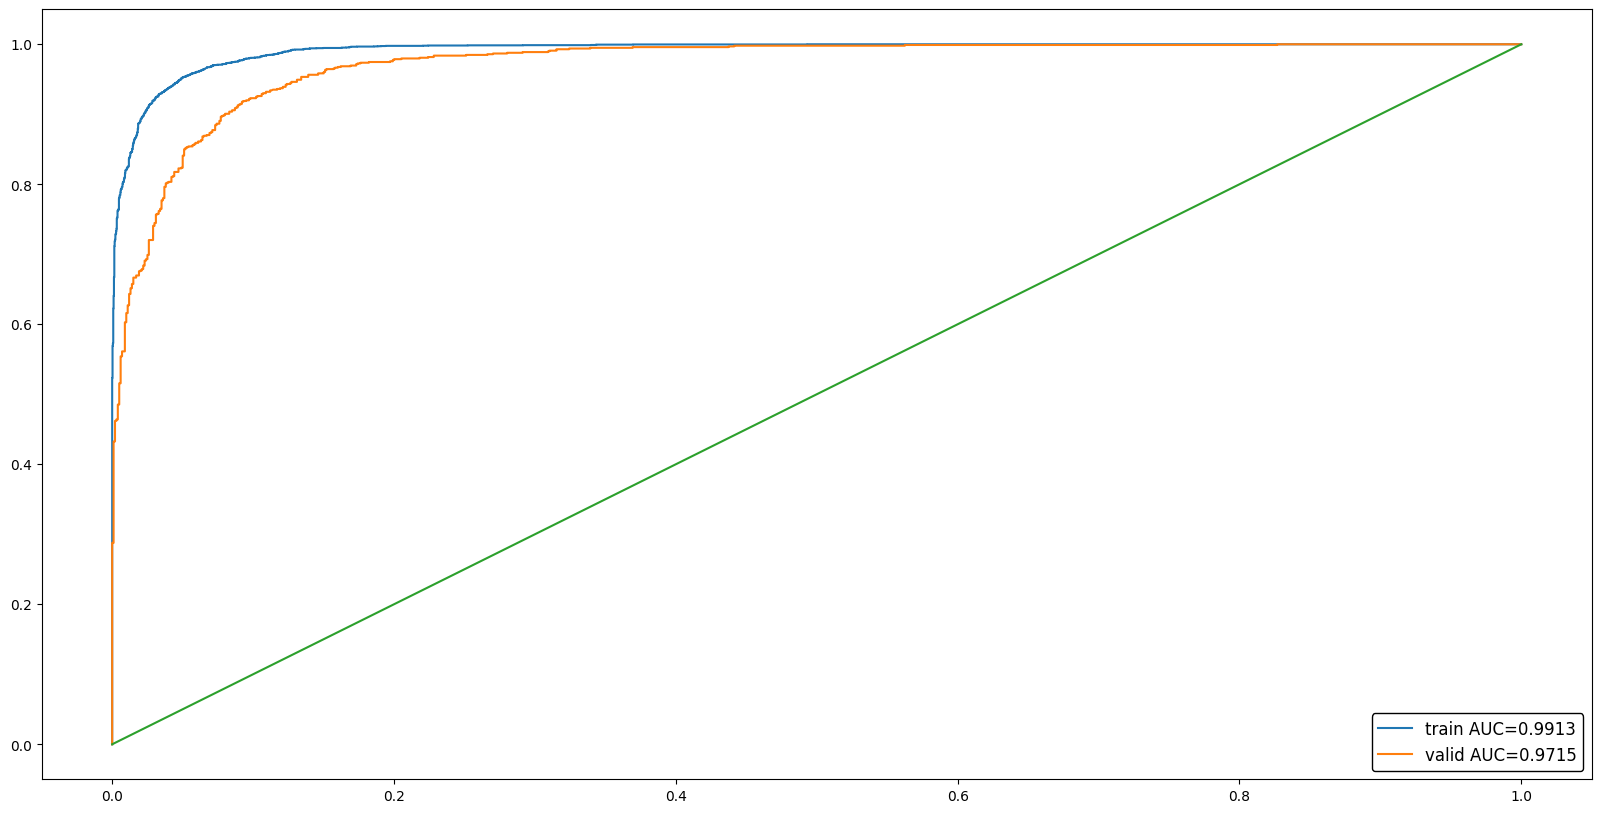

In [84]:
draw_for_tensor(model1)